In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=56)

In [37]:
# Fit a vanilla Logistic Regression classifier and make predictions
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)
y_pred_test = clf.predict(X_test)

In [38]:
# Function to calculate Precision and Recall

def calc_precision_recall(y_true, y_pred):
    
    # Convert predictions to series with index matching y_true
    y_pred = pd.Series(y_pred, index=y_true.index)
    
    # Instantiate counters
    TP = 0
    FP = 0
    FN = 0

    # Determine whether each prediction is TP, FP, TN, or FN
    for i in y_true.index: 
        if y_true[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_true[i]!=y_pred[i]:
           FP += 1
        if y_pred[i]==0 and y_test[i]!=y_pred[i]:
           FN += 1
    
    # Calculate true positive rate and false positive rate
    try:
        precision = TP / (TP + FP)
    except:
        precision = 1
    
    try:
        recall = TP / (TP + FN)
    except:
        recall = 1

    return precision, recall

# Test function

calc_precision_recall(y_test, y_pred_test)

(0.7941176470588235, 0.6923076923076923)

In [39]:
# LOGISTIC REGRESSION (NO REGULARIZATION)

# Fit and predict test class probabilities
lr = LogisticRegression(max_iter=10000, penalty='none')
lr.fit(X_train, y_train)
y_test_probs = lr.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
precision_scores = []
recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0, 1, num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    precision_scores.append(precision)
    recall_scores.append(recall)

In [41]:
# LOGISTIC REGRESSION (L2 REGULARIZATION)

# Fit and predict test class probabilities
lr_l2 = LogisticRegression(max_iter=1000, penalty='l2')
lr_l2.fit(X_train, y_train)
y_test_probs = lr_l2.predict_proba(X_test)[:,1]

# Containers for true positive / false positive rates
l2_precision_scores = []
l2_recall_scores = []

# Define probability thresholds to use, between 0 and 1
probability_thresholds = np.linspace(0,1,num=100)

# Find true positive / false positive rate for each threshold
for p in probability_thresholds:
    
    y_test_preds = []
    
    for prob in y_test_probs:
        if prob > p:
            y_test_preds.append(1)
        else:
            y_test_preds.append(0)
            
    precision, recall = calc_precision_recall(y_test, y_test_preds)
        
    l2_precision_scores.append(precision)
    l2_recall_scores.append(recall)

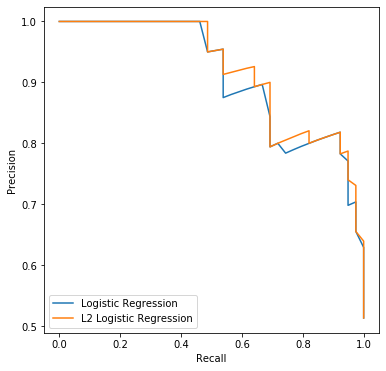

In [43]:
# Plot precision-recall curve

fig, ax = plt.subplots(figsize=(6,6))
ax.plot(recall_scores, precision_scores, label='Logistic Regression')
ax.plot(l2_recall_scores, l2_precision_scores, label='L2 Logistic Regression')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.legend(loc='lower left');

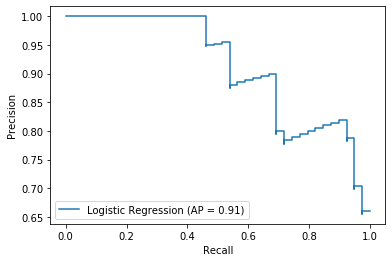

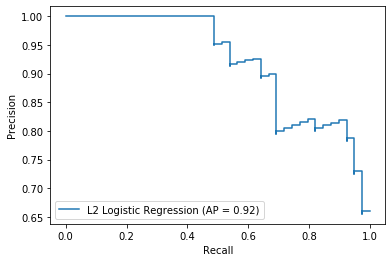

In [44]:
# Use sklearn to plot precision-recall curves

from sklearn.metrics import plot_precision_recall_curve

plot_precision_recall_curve(lr, X_test, y_test, name = 'Logistic Regression')
plot_precision_recall_curve(lr_l2, X_test, y_test, name = 'L2 Logistic Regression');

In [45]:
# Get AUC scores

from sklearn.metrics import auc

print(f'Logistic Regression (No reg.) AUC {auc(precision_scores, recall_scores)}')
print(f'Logistic Regression (L2 reg.) AUC {auc(l2_precision_scores, l2_recall_scores)}')

ValueError: x is neither increasing nor decreasing : [0.51315789 0.55714286 0.58208955 0.609375   0.62903226 0.62903226
 0.65517241 0.67857143 0.67857143 0.67857143 0.7037037  0.69811321
 0.71153846 0.7254902  0.75510204 0.77083333 0.77083333 0.77083333
 0.77083333 0.77083333 0.77083333 0.77083333 0.7826087  0.7826087
 0.7826087  0.7826087  0.7826087  0.7826087  0.7826087  0.8
 0.81818182 0.81818182 0.81395349 0.81395349 0.80487805 0.80487805
 0.80487805 0.80487805 0.79487179 0.79487179 0.79487179 0.79487179
 0.79487179 0.79487179 0.78947368 0.78378378 0.78378378 0.8
 0.79411765 0.81818182 0.81818182 0.81818182 0.81818182 0.84375
 0.84375    0.84375    0.84375    0.84375    0.89655172 0.89655172
 0.89655172 0.89285714 0.89285714 0.89285714 0.88888889 0.88888889
 0.88888889 0.88888889 0.88       0.88       0.88       0.875
 0.875      0.91304348 0.91304348 0.95454545 0.95       0.95
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.        ].